In [1]:
library(tidyverse)
library(repr)
library(datateachr)
library(digest)
library(infer)
library(gridExtra)
library(cowplot)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.2 ──
✔ ggplot2 3.3.6      ✔ purrr   0.3.4 
✔ tibble  3.1.8      ✔ dplyr   1.0.10
✔ tidyr   1.2.1      ✔ stringr 1.4.1 
✔ readr   2.1.2      ✔ forcats 0.5.2 
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Attaching package: ‘gridExtra’


The following object is masked from ‘package:dplyr’:

    combine




In [21]:
money <- read_csv("salaries.csv")
head(money)
table(money$salary_currency)

Rows: 2323 Columns: 11
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (7): experience_level, employment_type, job_title, salary_currency, empl...
dbl (4): work_year, salary, salary_in_usd, remote_ratio

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
<dbl>,<chr>,<chr>,<chr>,<dbl>,<chr>,<dbl>,<chr>,<dbl>,<chr>,<chr>
2023,SE,FT,Security Engineer,150000,USD,150000,US,0,US,M
2023,SE,FT,Security Engineer,120000,USD,120000,US,0,US,M
2023,SE,FT,Security Engineer,120000,USD,120000,US,0,US,M
2023,SE,FT,Security Engineer,85000,USD,85000,US,0,US,M
2023,SE,FT,Security Engineer,240500,USD,240500,US,0,US,M
2023,SE,FT,Security Engineer,137500,USD,137500,US,0,US,M



 AUD  BRL  CAD  CHF  CZK  DKK  EUR  GBP  HUF  IDR  ILS  INR  MXN  NOK  NZD  PLN 
  19   12   50   10    1    5  170  100    1    1    2   24    1    1    5    4 
 SEK  SGD  TWD  USD  ZAR 
   3    2    1 1908    3 

In [49]:
money_relevant <- money |>
    filter(work_year == 2021 | work_year == 2022) |>
    select(work_year, salary_in_usd)

money_relevant$work_year <- as.factor(money_relevant$work_year)

head(money_relevant) 
table(money_relevant$work_year)

work_year,salary_in_usd
<fct>,<dbl>
2022,126080
2022,60000
2021,6085
2022,64000
2022,117000
2022,75000



2021 2022 
 485 1067 

In [50]:
annual_average <- money_relevant |> 
    filter(!is.na(salary_in_usd)) |>
    group_by(work_year) |>
    summarize(mean_wage = mean(salary_in_usd), sd_wage = sd(salary_in_usd),
             n = n())
annual_average

work_year,mean_wage,sd_wage,n
<fct>,<dbl>,<dbl>,<int>
2021,105728.4,57923.03,485
2022,133228.4,60346.89,1067


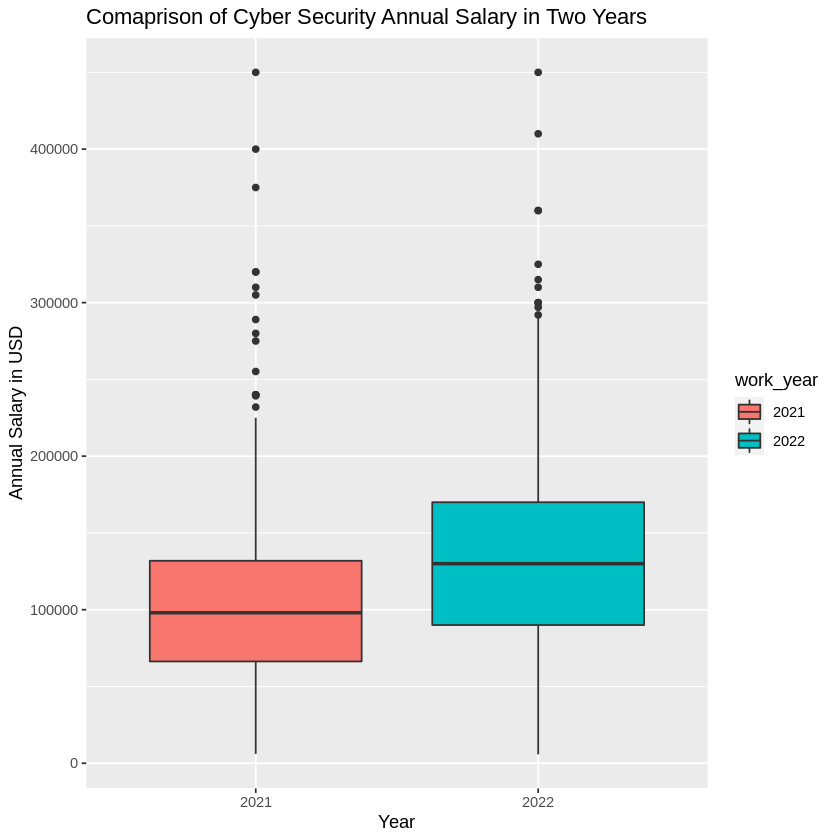

In [53]:
options(scipen = 5000)
aa_graph <- money_relevant |>   
    ggplot() +
    geom_boxplot(aes(x = work_year, y = salary_in_usd, fill = work_year)) +
    xlab("Year") +
    ylab("Annual Salary in USD") +
    ggtitle("Comaprison of Cyber Security Annual Salary in Two Years")
aa_graph